## SLU07 - Advanced Statistics: Learning notebook

In this notebook we will cover the following:

- Probability Distributions

    - Normal
    - Binomial
    - Geometric
    - Exponential
    - Poisson
    - Student's T

- Point estimates
- Confidence intervals

- Significance tests
    - One-sample T-test
    - Chi-squared goodness of fit test


## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# this allows us to see our plots in the notebook:
% matplotlib inline

A probability distribution is a mathematical function that describes the values (and the respective probabilities) that a random variable can assume.

Now that sounds scary, but this is not your average statistics class! We're not gonna ask you to memorize these formulas. You'll just need to know:

> 1. What distribution you're looking at
> 2. What functions you can use

To do all of this programatically, we'll use a library called [SciPy](https://www.scipy.org/), which has a really cool statistics module.

In [2]:
import scipy.stats as stats

___________

# Normal Distribution

The normal distribution is a continous probability distribution, and its the most common distribution you'll find. 

It describes well a lot of random phenomenons, such as human height.

The notation is:


# $ {\mathcal {N}}(\mu ,\sigma ^{2}) $


The parameters are just: 


### $ mean = {\mathcal \mu \in \mathbb {R} } $
### $ variance = { \sigma ^{2}>0} $

### Example
Let's model the height of men in Portugal.

We know that human height is normally distributed, so our choice of using a normal distribution is solid.

We just need the parameters, which are:

> $\mathcal \mu$ = 174 cm

> $\sigma ^{2}$ = $ 8.2 ^ {2}$ cm


So our normal distribution is:
## $ {\mathcal {N}}(174, 67.24) $

Let's generate some 10000 datapoints from this distribution.
Since we are using a normal distribution, we'll use `stats.norm`. 

We'll use its `.rsv` method to generated some data from this dristribution. You can see that here, `loc` is the mean, and `scale` is the standard deviation (which gets squared by the function)

In [3]:
normal_data = stats.norm.rvs(size=10000, loc=174, scale=8.2, random_state=0)

Let's plot it!

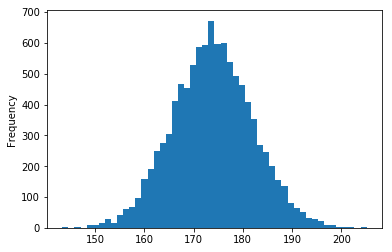

In [4]:
pd.Series(normal_data).plot(kind="hist", bins=50)

You can see the distictive bell-shape. The height of most men sits around in the center, with the extreme values being rarer.

Now that we have the distribution, we can use some functions to gain insights.

## Cumulative distribution function: `.cdf()`

This function tells us the probability that the random variable will assume a value less than the one you provide.

Hugo is 193 cm tall. What percentage of men are shorter than him?

In [5]:
stats.norm.cdf(x=193,         # Cutoff value (quantile) to check
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

0.989750126890689

He's taller than almost 99% of men!

## Percent point function: `.ppf()`

This function is the inverse of `.cdf()`; Instead of inputing a quantile and reciveing a probablity, we input a probability and recieve a quantile.

Below which height are 90% of men?

In [6]:
stats.norm.ppf(q=0.9,       # Cutoff value (quantile) to check
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

184.5087228374657

This means that 90% of men are under 184.5 cm of height.

## Probability density function: `.pdf()`

This function gives us the relatively likelihood of the random variable assuming a certain value.

For example, the relative likelihood of a randomly chosen man from this population being 170 cm tall:

In [7]:
stats.norm.pdf(x=170,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.04319418121078366

And now the relative likelihood of a randomdly chosen man from this population being 150 cm tall:


In [8]:
stats.norm.pdf(x=150,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.0006713382361063932

You can think of these values as the probability density at value: it's more likely for a man to be 170 cm tall as opposed to 150 cm tall.

___________

# Binomial Distribution

The binomial distribution is a discrete probability distribution that models the number of sucesses in a set of independent trials.

It describes random phenomenenon such as the number of heads you'll get, when you flip a coin a number of times.

The notation is: 

# $ B(n, p) $

The parameters are just: 
 
### $ n ∈ N0 $ - number of  trials

### $ p ∈ [0,1] $ - success probability in each trial

### Example
Let's model the number of heads we get when we flip a coin 10 times. This is a fair coin, so the chance of getting heads at each trial is 50%.

So our parameters are:

> n = 10

> p = 0.5


So our binomial distribution is:
## $ B(10, 0.5) $

Let's generate some 10000 datapoints from this distribution. 
This means we'll performing 10000 experiments, in which we flip a coin 10 times.

Since we are using a binomial distribution, we'll use `stats.binom`. 

We'll use its `.rsv` method to generated the data. You can see that here, `n` is the number of trials, and `p` is the probability of success in each trial.

In [9]:
binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)

Let's plot it!

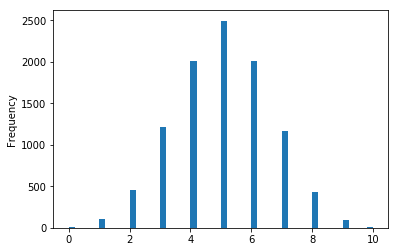

In [10]:
pd.Series(binomial_data).plot(kind="hist", bins = 50)

Now, unlike the normal distribution, this is a discrete distribution, meaning that the random variable can only assume discrete integer values. It does however sort of look like a normal distribution, in the sense that it is symmetric, but that changes when you use a `p` different from 0.5.

Let's now toss a biased coin. This a coin that is more likely to land on heads than tails.

In [11]:
biased_coin_data = stats.binom.rvs(size=10000, n=10, p=0.8, random_state=0)

And let's plot it.

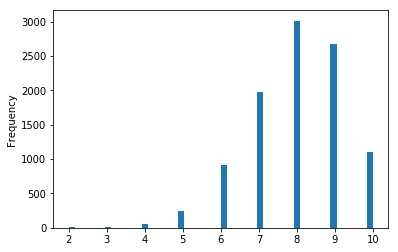

In [12]:
pd.Series(biased_coin_data).plot(kind="hist", bins=50)

You can see that this biased coin is more likely to get more heads in 10 trials than the fair coin. The distribution "shifted" to the right, so to speak.

Let's now use some functions to gain insights.

## Cumulative distribution function: `.cdf()`

This function tells us the probability that the random variable will assume a value less (or equal) to the one you provide.

Let's find out the probability of getting 7 heads in 10 trials, with this biased coin.


In [13]:
stats.binom.cdf(k=7,        # Probability of k = 7 heads or less
                n=10,       # In 10 trials
                p=0.8)      # And success probability 0.8

0.3222004736

If you want to ask the question "what is the probablity of getting at least 7 heads in 10 trails?", you are actually asking "What is the probability of NOT getting 6 or less heads in 10 trials". 

We express the "NOT" by subtracting the probability from 1, like this:

In [14]:
1 - stats.binom.cdf(k=6,        # Probability of k = 6 heads or less
                    n=10,       # In 10 trials
                    p=0.8)      # And success probability 0.8

0.8791261184000001

## Probability mass function: `.pmf()`

Before, we used `.pdf()` to check the probability density on a certain point of a continuous probability density function. However, the binomial distribution is a discrete probability distribution, so instead we use `.pmf()` to check the proportion of observations at a certain point.

Let's find out the probability of getting __exactly__ 5 heads in 10 trails, on our biased coin.

In [15]:
stats.binom.pmf(k=5,        # Probability of k = 5 heads
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.5

0.02642411520000004

_______

#  Geometric Distribution and Exponential distribution

These distributions are useful when you want to model the time it takes for an event to occur.

The geometric distribution is a discrete distribution, and it's useful for modelling things like number of times you need to flip a coin before you see heads.

The exponential distribution is its continuous analogue, and it's useful for modelling things like the time you need to wait before your bus arrives, knowing that there is a bus every 15 minutes.

While these distributions are useful, we have a lot of ground to cover so we can't explain them here.

Refer to these resources if you later want to learn more about them:

________

# Poisson Distribution

This distribution is useful when you want to model the probability of the number of times an event is likely to occur, within a certain timeframe.

It's useful to model things such as the number of pacients an hospital will recieve within an hour.

While also a very useful distribution, we have a lot to cover, so I leave it up to you to learn more about it if you want.

__________

# Point estimates

We need to know 2 important concepts:

> 1. Population
> 2. Sample

Imagine you're selling a product, and your product is in fact so popular, that you have tens of thousands of customers. Now, you'd like to know more about your customers, like what their average age is.

Now, if we could reach out to every single one of your customers and ask them their age, we could calculate the __Population mean__.

But since we can't do that, we have to settle for asking a sample of costumers their age, and calculating the __Sample mean__.

What this means, is that we can use the __Sample mean__ to estimate the __Population mean__.

Let's give it a try:

In [16]:
np.random.seed(3)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = pd.Series(np.concatenate((population_ages1, population_ages2)))


In [17]:
population_ages.mean()

42.995484

In [18]:
age_sample = population_ages.sample(500, random_state=0)
age_sample.mean()

42.654

Not too bad, right? With just 500 people, we got a pretty good estimate of the mean population age.

If we wanted to be even more sure, we could take several samples, to check if that value doesn't change widly a lot from sample to sample. You see where I'm getting at? We plot out sampling distribution!

Let's do that then. We'll take a sample of 500, take the mean of that sample, and record that mean. We do that process and bunch of times.

Let's try doing that 20 times.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a5470b8>]],
      dtype=object)

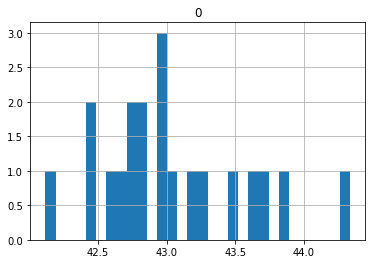

In [19]:
seed_number = 0

point_estimates = []        # Make empty list to hold point estimates
for x in range(20):         # Generate 200 samples
    np.random.seed(seed_number)
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
    seed_number += 1
    
pd.DataFrame(point_estimates).hist(bins=30)   

The distribution doesn't seem very evident here. Let's take more 50 samples, and see if it helps.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a3c89e8>]],
      dtype=object)

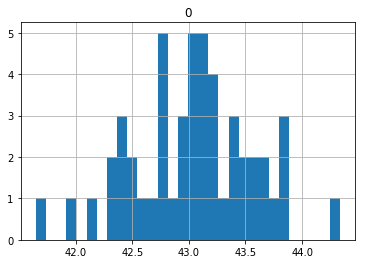

In [20]:
seed_number = 0

point_estimates = []         # Make empty list to hold point estimates
for x in range(50):          # Generate 200 samples
    np.random.seed(seed_number)
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
    seed_number += 1
    
pd.DataFrame(point_estimates).hist(bins=30)   

It's starting to look like something even seen before, no? Let's take 1000 samples!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10aa2f2b0>]],
      dtype=object)

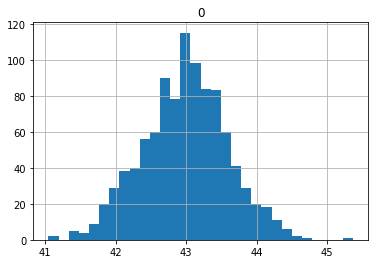

In [21]:
seed_number = 0

point_estimates = []         # Make empty list to hold point estimates
for x in range(1000):         # Generate 200 samples
    np.random.seed(seed_number)
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
    seed_number += 1
    
pd.DataFrame(point_estimates).hist(bins=30)   

Cool, isn't it? If we take the mean of a lot of samples, the resulting distribution will be a normal distribution! This is one of the most concepts in probability theory, and it's called the Central Limit Theorem. It tells us that distribution of many sample means will be normally distributed, no matter the underlying distribution.

Wait, no matter the underlying distribution? Let's look at the distribution of ages for a sample of our population.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b33c588>]],
      dtype=object)

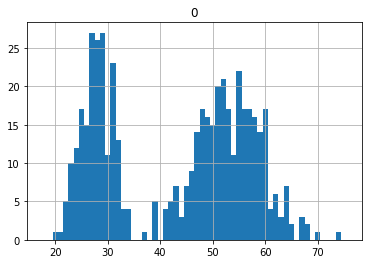

In [22]:
pd.DataFrame(population_ages.sample(500)).hist(bins=58,
                                  range=(17.5,75.5))


Well, the distribution of ages on our sample doesn't look normally distributed at all. Maybe this is just an anomally?
Let's now take a look at the distribution of ages for our entire population.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a698cf8>]],
      dtype=object)

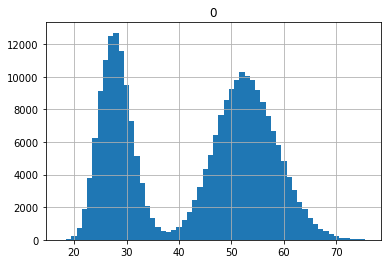

In [23]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5))

Yup, the distribution of the population is the same; the distribution of the sample mirrors it.

This is what we mean by "distribution of many sample means will be normally distributed, no matter the underlying distribution". And this is an extremely useful concept, because it means we can apply a bunch of statistical techniques that assume that our distribution is normal!

Now, remember that we were trying to estimate the mean age of our population using the mean age of a sample. Let's assume we can only take a single sample of 500. 

We're going to get a value for the mean age, sure, but as we've seen before, that value is subject to randomness, and that randomness is described by a normal distribution.

Maybe what we want is not to present a single value for our estimated population mean, but a confidence interval; An interval of values, for which we can say something like: "We are 95% confident that the population mean is between 42 and 44."

The cool thing about our sampling distribution for the mean being a normal distribution, is that it makes it easy to calculate those confidence intervals. Let me show you.

# Confidence Intervals

The way we calculate a confidence interval is by taking point estimate (the mean) and then adding and subtracting a margin of error.

The formula for the margin of error is:

# $ Z * \frac{\sigma}{\sqrt{n}} $

The parameters are:

__Z__ - it stands for Z-score, which is the number of standard deviations from the mean that you need to capture the desired confidence level. 

>For example, if we wanted a confidence interval of 95%, we could use a Z-score of 2, because roughly 95% of the data is within 2 standard deviations from the mean. But to be more exact, we can use `stats.norm.ppf()` to get the Z-score, by inputing the quantile.

$ {\sigma} $ - standard deviation of the population.

> Uh oh. You might be asking yourself, how are we supposed to know the standard deviation of the population, if all we have access is a sample? We'll see ahead a stategy to deal with this.

__n__ - the number of samples.

Since we don't have access to the standard deviation of the population, we can use the standard deviation of the sample instead. But by doing this, we are introducing a source of error; To compensate for it, instead of using the Z-score, we'll use something called the T-score. 

The T-score comes from a special distribution, called the Student's T-distribution. It resembles the normal distribution, except it gets wider if the sample size is low, and as the sample size increases, it becomes equal to the Normal distribution.
The T-distribution needs a parameter called the `degrees of freedom`, which is just the sample size minus 1.

Let's see:

![title](data/t-dist.gif)

As you can see, as we increase our sample size, the T-distribution gets closer to the Normal distribution.

So we end up with:

# $ T * \frac{\sigma}{\sqrt{n}} $

In which T is the T-score, $\sigma$ is the standard deviation of the sample, and n is the number of samples.

Let's put it all together, and calculate the 95% confidence interval for the mean age of the population!

First we get the mean age in the sample:

In [24]:
mean_sample_age = age_sample.mean()

Now we get the T-score. Since we want a 95% confidence interval, that means our significance level ($\alpha$) is 0.05.

And since the distribution has two tails, we need to do:

1 - 0.95 = 0.05

0.05 / 2 = 0.025

1 - 0.025 = 0.975

0.975 is then the quantile we want.

`df`, aka degrees of freedom, is 499 because it's the sample size minus 1.

In [25]:
t_critical = stats.t.ppf(q = 0.975, df=499)

Now we need $\sigma$, which is the standard deviation for the sample:

In [26]:
std_sample_age = age_sample.std()

And $\sqrt{n}$, which is just the square root for the number of samples.

In [27]:
sqrt_of_n_samples = np.sqrt(500)

Putting it all together:

In [28]:
error_margin = t_critical * std_sample_age / sqrt_of_n_samples

confidence_interval = (mean_sample_age - error_margin,
                       mean_sample_age + error_margin)

print(confidence_interval)

(41.502911561527775, 43.80508843847223)


Tada! Now, while it was important to understand how a confidence interval is calculated, for convinience, we can do it all using `t.interval()`!

In [29]:
stats.t.interval(alpha = 0.95,                               # Confidence level
                 df= 499,                                    # Degrees of freedom
                 loc = mean_sample_age,                      # Sample mean
                 scale = std_sample_age / sqrt_of_n_samples) # Standard deviation of the sample divided by the square root of the number of samples

(41.502911561527775, 43.80508843847223)

___ 

# Hypotesis testing

Hypthesis testing is based on making a statement, the "null hypothesis", that nothing interesting is going on between the variables you're studying. Then, you at the evidence, and ask yourself "Does the evidence support this idea that nothing interesting is going on?". 

For example, imagine you take the data you have on your clients, `age_sample`. For the purposes of  this, we're going to consider this as our population.

Now, you're selling your product on a given day, and you got 15 new clients. You ask yourself: "Is the mean age of the costumers who bought my product today different from the mean age of my typical costumers?"

In other words, you want to know if the possible difference in mean age is so great, that it would be very unlikely for it to happen by pure chance. A difference so significant, that makes you think some other factor may be at hand.

When the difference is so great that it is very unlikely for it to happen by pure chance, you reject the "null hypothesis" (that nothing interesting is going on) in favor of the "alternative hypothesis" (that something interesting is going on). In our case, it could be that on this particular day there was a school holiday, causing a bunch of kids to come to your store.

Now, to define what we mean by "very unlikely for it to happen by pure chance", we have to define what very unlikely is. I won't go very deep into the pitfalls associated with defining a confidence level, but a very common confidence level is $\alpha$ = 0.05.

When doing a significance test, there two possible types of error:

__Type I error__
> You reject the null hypothesis in favor of the alternative hypothesis, but the null hypothesis was actually true. Also know as a false positive. With a $\alpha$ = 0.05 significance level, you expect this type of error to happen 5% of the time. The higher the $\alpha$, the less likely you are to make this error.


__Type II error__
>You do not reject the null hypothesis in favor of the alternative hypothesis, but the alternative hypothesis was actually true. Also know as a false negative. The lower the $\alpha$, the less likely you are to make this error.

Now, what we want to do is to check if the mean age from our new sample differs from the mean age of our population. for that, we're going to use a __One Sample T-Test__. For that, we'll use `stats.ttest_1samp()`.

# One Sample T-Test

Let's first check the mean age of the costumers we have on record:

In [30]:
mean_population_age = age_sample.mean() # Remember, right now we're considering the data we have on 500 costumers as our population

mean_population_age

42.654

Let's now check the mean age of the clients we had today:

In [31]:
new_client_ages = np.array([15, 13, 14, 54, 16, 12, 10, 16, 14, 12, 10, 13, 60, 42, 11])

new_client_ages.mean()

20.8

Alright, the mean age seems pretty different; But how do we know if this difference is significant? In other words, how do we know if a result as extreme as this is unlikely to happen due to chance?

For that, we'll use the One Sample T-Test, which compares the mean of a new sample with the mean of the population, and tests if the difference is significant.

In [32]:
stats.ttest_1samp(a= new_client_ages,               # New client ages
                  popmean= mean_population_age)     # Population mean

Ttest_1sampResult(statistic=-5.093158539099996, pvalue=0.00016374485160662263)

The test returned a p-value of 0.00016374485160662263; 

Since this value is lower than the $\alpha$ = 0.05 confidence level we defined, we reject the null hypothesis; We say that the evidence supports the alternative hypothesis; That some other factor is at play, because it's unlikely to get a result as extreme as this by pure chance.

There are types of T-tests, adequate for other situations, which we can't cover here. You can find them [here](https://hamelg.blogspot.pt/2015/11/python-for-data-analysis-part-24.html).

Now what if you want to investigate a categorical variable? You're going to need another type of test, called a Chi-Squared Test.

# Chi-Squared Goodness-Of-Fit Test

The Chi-Squared goodness-of-fit test allows us to test if a sample of categorical data matches an expected distribution.

For example, let's say we have 4 different products: A, B, C.

We expect A to represent on average 0.2 of our sales, B on average 0.5, and C on average 0.3.

Let's say today our sales were:

In [33]:
sales_df = pd.DataFrame({
    'A': 37,
    'B': 110,
    'C': 50
}, index=['sales'])

sales_df

,A,B,C
sales,37,110,50


A total of:

In [34]:
sales_df.loc['sales'].sum()

197

The expected counts are:

In [35]:
print('Expected count for 197 sales: ')
print('Product A: ' + str(197 * 0.2))
print('Product B: ' + str(197 * 0.5))
print('Product C: ' + str(197 * 0.3))

Expected count for 197 sales: 
Product A: 39.400000000000006
Product B: 98.5
Product C: 59.099999999999994


We want to know if the observed counts are in line with the expected counts (the null hypothesis), or if the observed count differ from the expected counts (alternative hypothesis). 

We'll define $\alpha$ = 0.05 as our significance level.
To do the test itself, we use `stats.chisquare()`.

In [36]:
stats.chisquare(f_obs= [37, 110, 50],        # Array of observed counts
                f_exp= [39.4, 98.5, 59.1])   # Array of expected counts

Power_divergenceResult(statistic=2.890016920473774, pvalue=0.23574408209664746)

As you can see, the p-value is much higher than our significance level, so we do not reject the null hypothesis; the observed counts are in line with the expected counts.

# Wrap up

That was a lot to cover! There are all sorts of distributions and statistical tests, but we can use them easily using python libraries such as [Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

To learn more about using statistics in practice, I recommend you look at this brilliant series of blog posts on [data analysis in python](https://hamelg.blogspot.pt/2015/12/python-for-data-analysis-index.html) (you'll see that a lot of the content in this learning unit was inspired / borrowed from these blogposts!)

To learn more about statistics on a theoretical standpoint, I recommend [this free book](https://www.openintro.org/stat/textbook.php?stat_book=os) which will teach you all the foundations you need in a motivating way!